In [1]:
import pandas as pd
import numpy as np
import sys
import os
import time
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
sns.set_style('white')

from sklearn.model_selection import cross_val_score

In [3]:
pwd

'/home/shan/Data_Science/PRCP-1007-LiverPatientPred/Data'

In [4]:
df = pd.read_csv('Indian_Liver_Patient_Dataset_(ILPD).csv')
df.head()


,age,gender,data1,data2,data3,data4,data5,data6,data7,data8,data9
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.age

0      65
1      62
2      62
3      58
4      72
       ..
578    60
579    40
580    52
581    31
582    38
Name: age, Length: 583, dtype: int64

In [6]:
df.set_axis(['Age' ,'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alkaline_Aminotransferase','Aspartate_Aminotransferase','Total_Proteins','Albumin','Albumin_and_Globulin_Ratio','Outcome'],axis=1,inplace=True)

df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alkaline_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
df.shape

(583, 11)

In [8]:
print(df.columns)
print('*'*50)
for i in df.columns :
    print(i)
    print(df[i].describe())
    print('*'*50)

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alkaline_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Outcome'],
      dtype='object')
**************************************************
Age
count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: Age, dtype: float64
**************************************************
Gender
count      583
unique       2
top       Male
freq       441
Name: Gender, dtype: object
**************************************************
Total_Bilirubin
count    583.000000
mean       3.298799
std        6.209522
min        0.400000
25%        0.800000
50%        1.000000
75%        2.600000
max       75.000000
Name: Total_Bilirubin, dtype: float64
**************************************************
Direct_Bilirubin
count    583.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alkaline_Aminotransferase   583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Outcome                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### finding the missing values 

In [10]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alkaline_Aminotransferase     0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Outcome                       0
dtype: int64

In [11]:

df[df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alkaline_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Outcome
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [12]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alkaline_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [13]:
## droping the missing values
df = df.dropna()

In [14]:
print ('Total Unhealthy Livers : {} '.format(df.Outcome.value_counts()[1]))
print ('Total Healthy Livers : {} '.format(df.Outcome.value_counts()[2]))


Total Unhealthy Livers : 414 
Total Healthy Livers : 165 


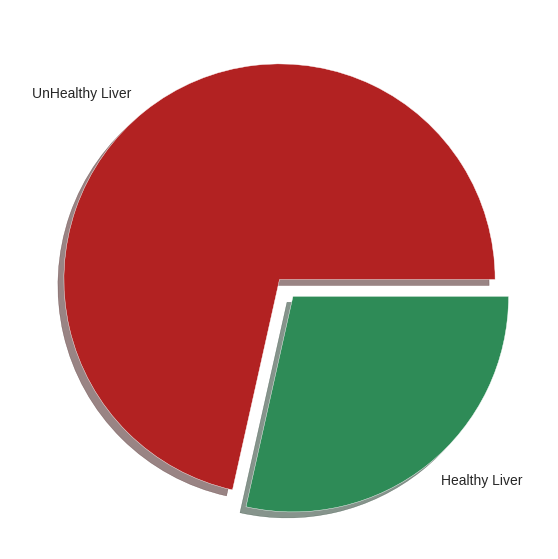

In [15]:
 
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))
 
plt.pie(x=df["Outcome"].value_counts(), 
        colors=["firebrick","seagreen"], 
        labels=["UnHealthy Liver","Healthy Liver"], 
        shadow = True, 
        explode = (0, 0.1)
        )
 
plt.show()


In [16]:
df.Gender.value_counts()

Male      439
Female    140
Name: Gender, dtype: int64

In [17]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})


In [18]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alkaline_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


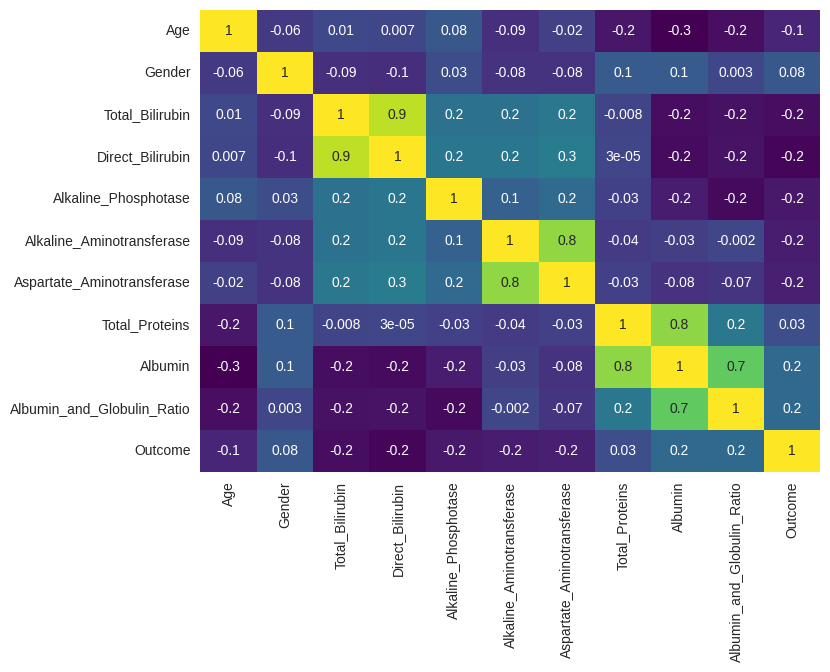

In [19]:
# Having a look at the correlation matrix
 
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False);


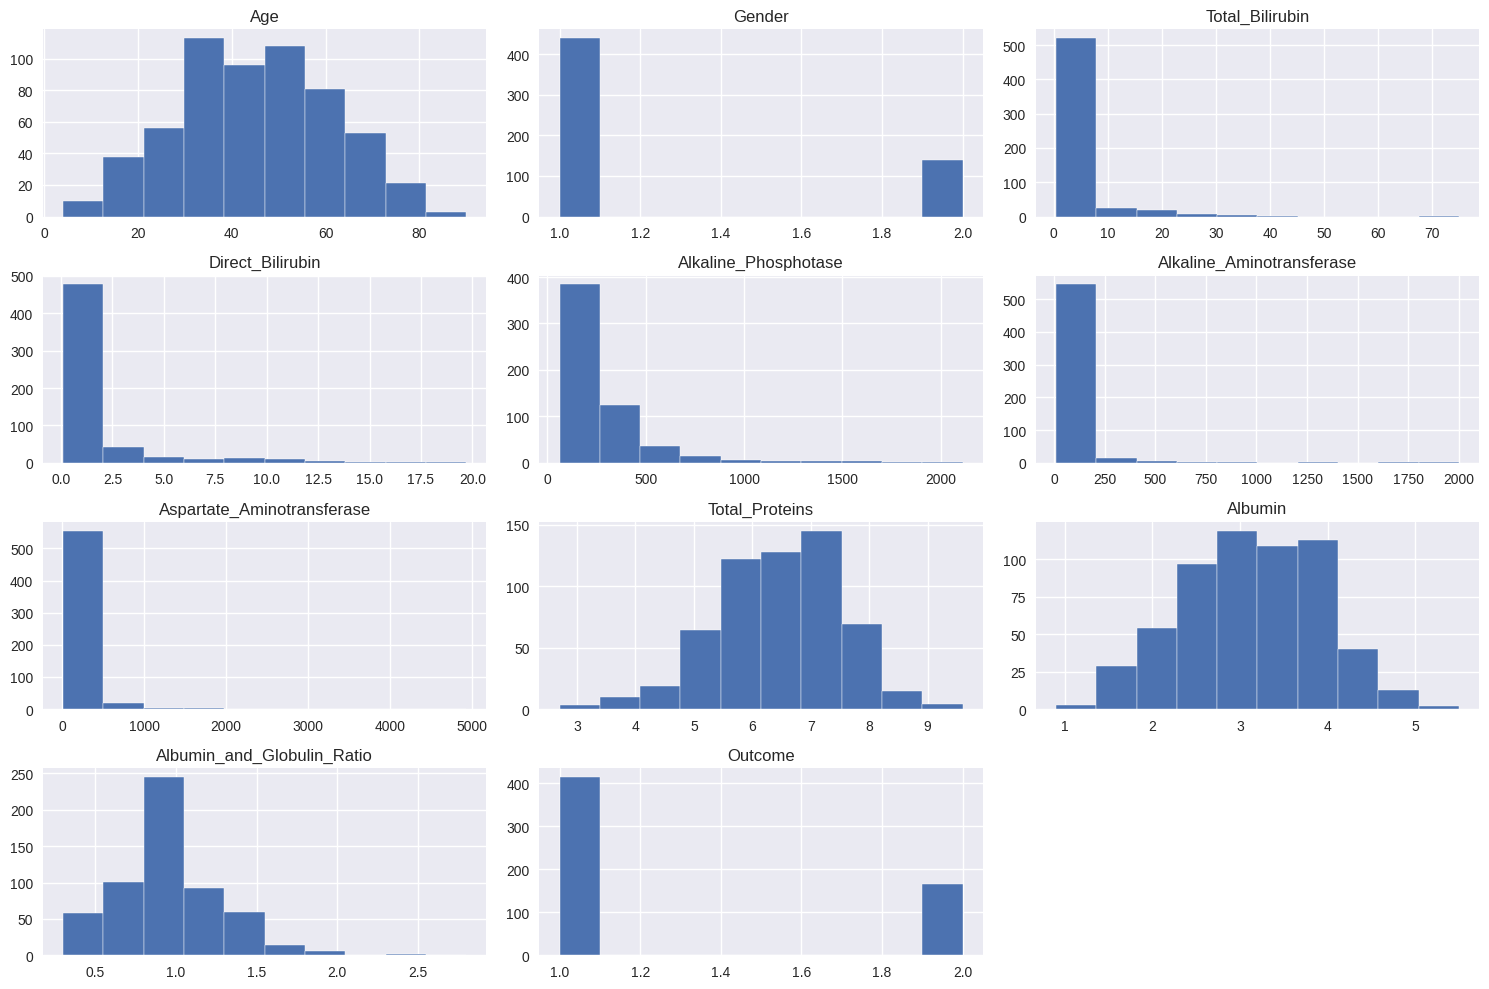

In [20]:
df.hist(figsize=(15,10))                   #Transformation is required 
plt.tight_layout()

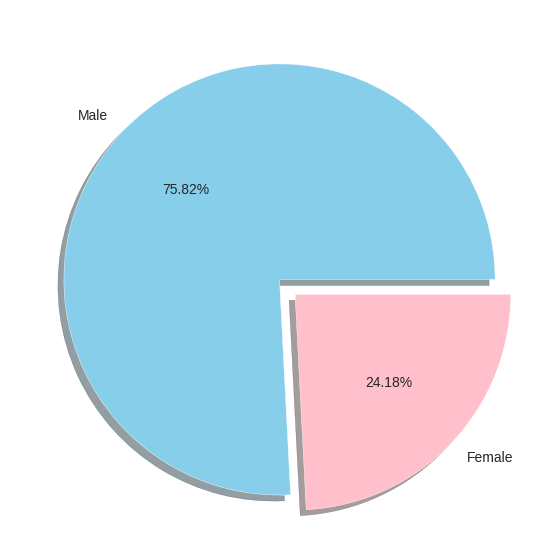

In [21]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))
plt.pie(x=df["Gender"].value_counts(), 
        colors=["skyblue","pink"], 
        labels=["Male","Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

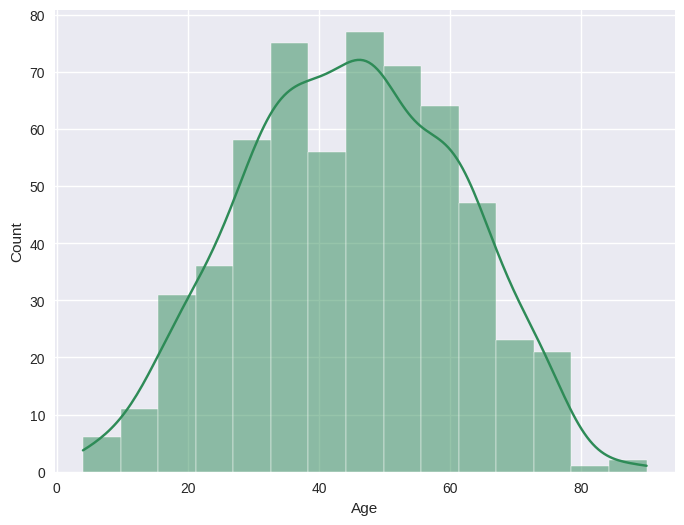

In [22]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x=df["Age"], kde=True, color="seagreen");

In [23]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alkaline_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Outcome
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,1.241796,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,1.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,2.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [24]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alkaline_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [25]:
# Dropping Null Values
df = df.dropna()
# Changing the values in "Liver_Disease" column 
df['Outcome'] = df['Outcome'] - 1 


In [26]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alkaline_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,0
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,0
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,0


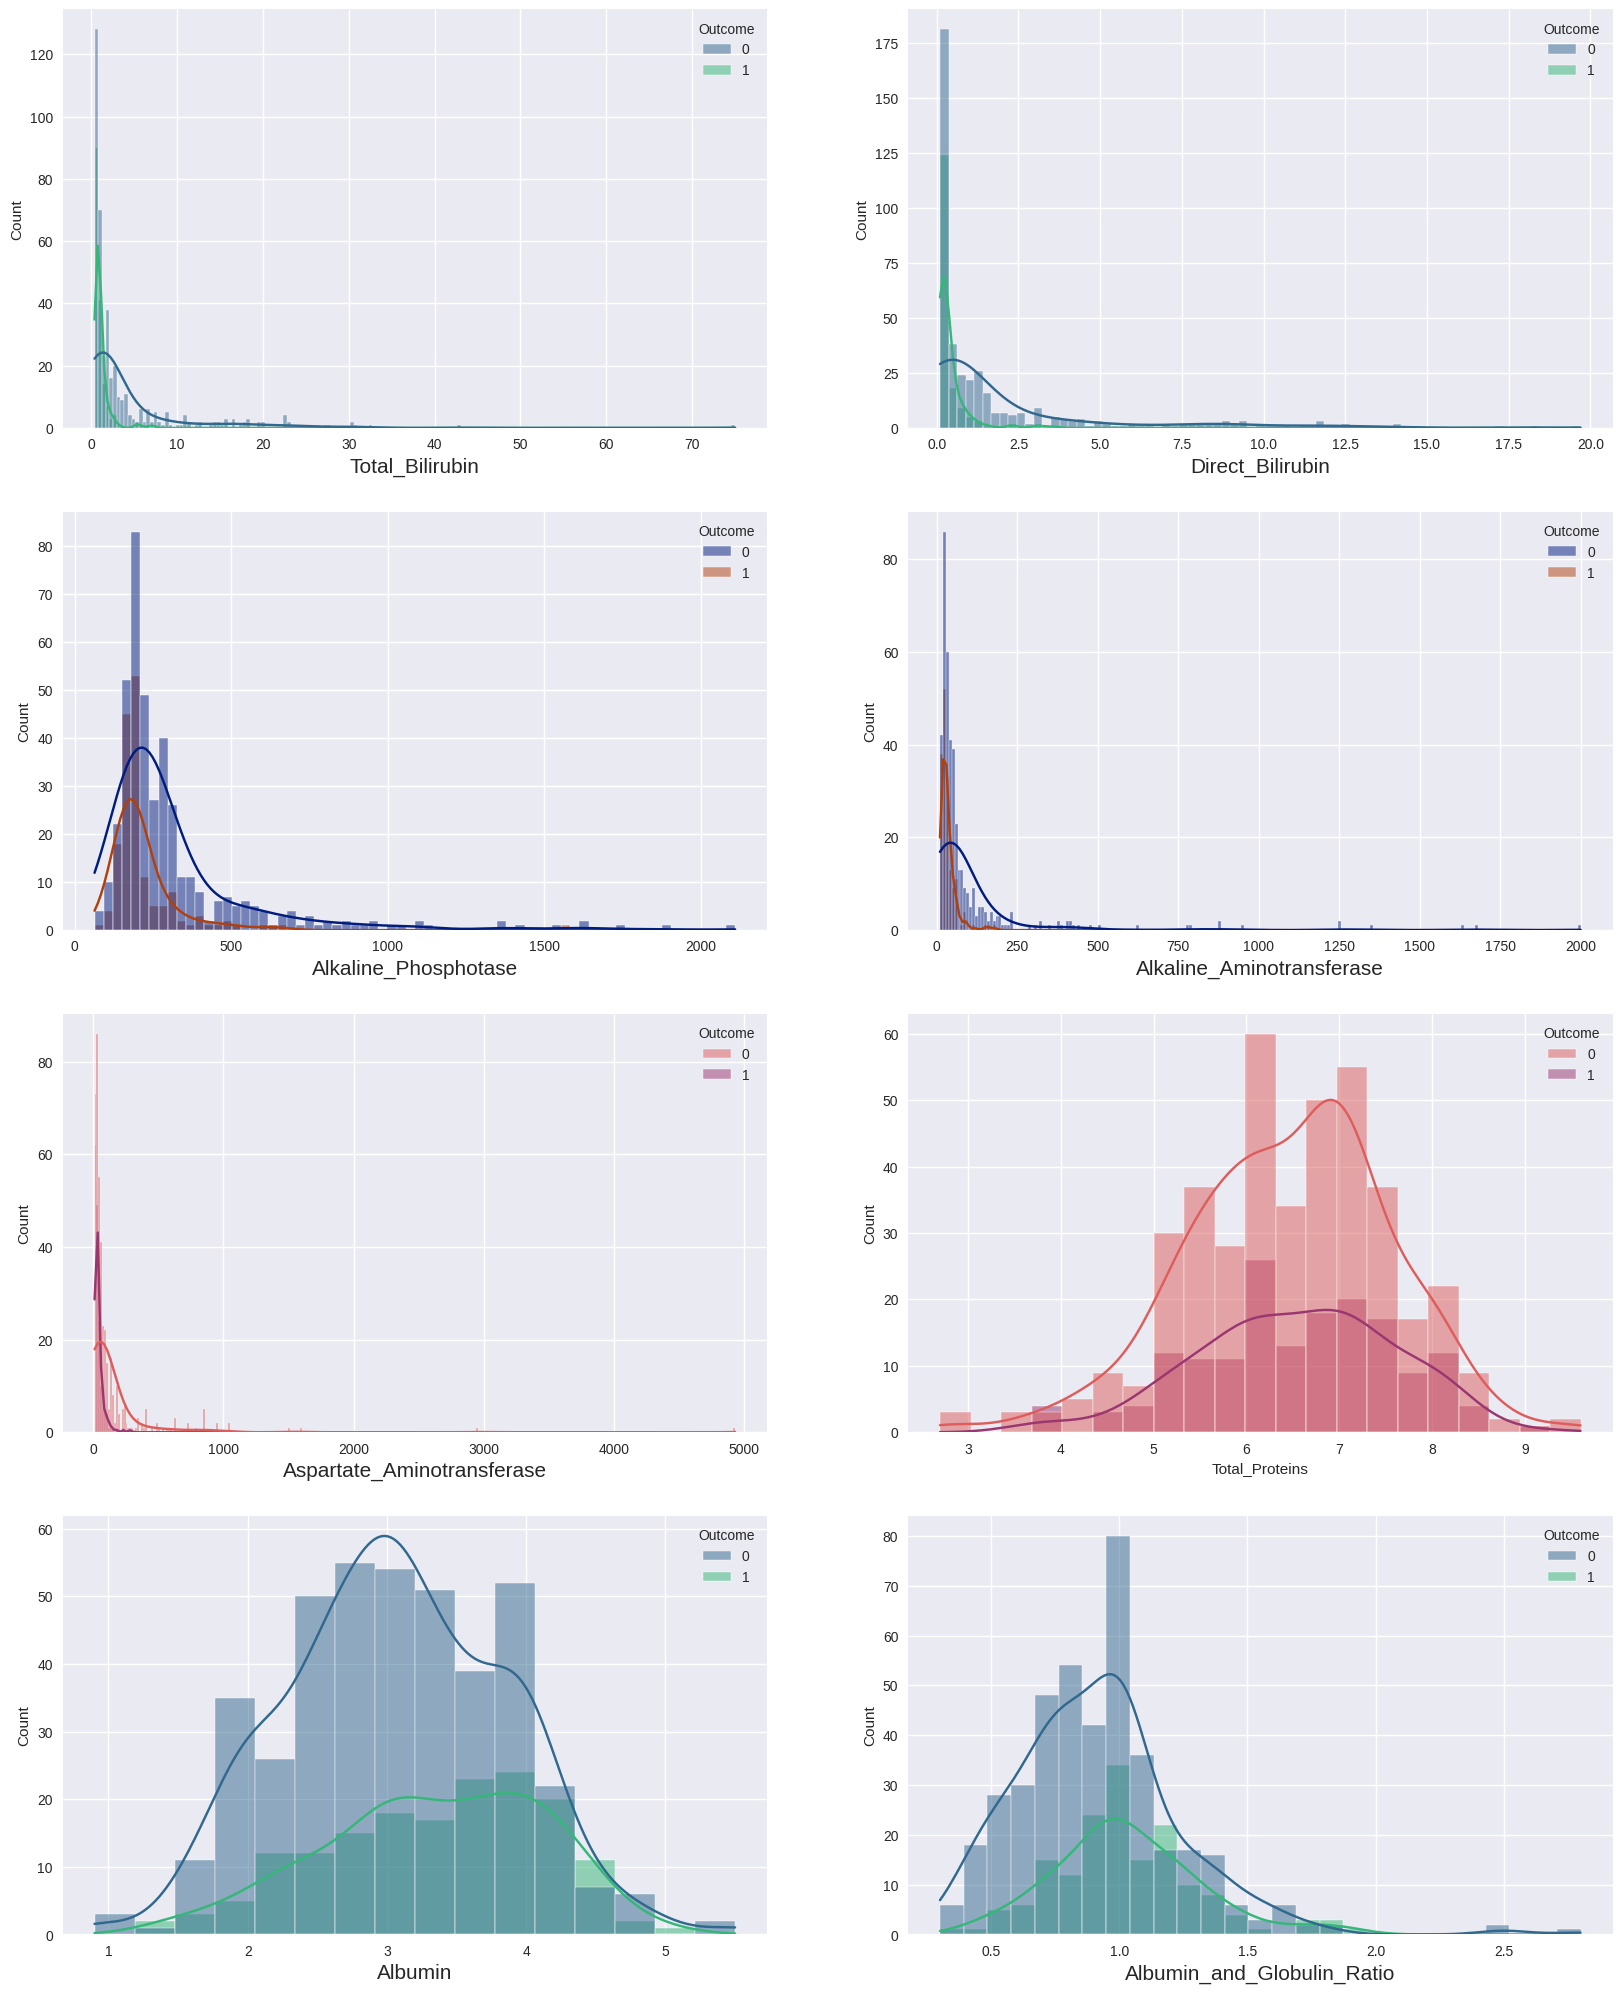

In [27]:
fig, ax =plt.subplots(4,2, figsize=(20,25)) 
plt.style.use("seaborn")
 
sns.histplot(x = df["Total_Bilirubin"], hue = df["Outcome"], palette="viridis", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("Total_Bilirubin",fontsize=15)
 
sns.histplot(x = df["Direct_Bilirubin"], hue = df["Outcome"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("Direct_Bilirubin",fontsize=15)
 
 
sns.histplot(x = df["Alkaline_Phosphotase"], hue = df["Outcome"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("Alkaline_Phosphotase",fontsize=15)
 
sns.histplot(x = df["Alkaline_Aminotransferase"], hue = df["Outcome"], palette="dark", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("Alkaline_Aminotransferase",fontsize=15)
 
 
sns.histplot(x = df["Aspartate_Aminotransferase"], hue = df["Outcome"], palette="flare", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("Aspartate_Aminotransferase",fontsize=15)
 
sns.histplot(x = df["Total_Proteins"], hue = df["Outcome"], palette="flare", kde=True, ax=ax[2,1]);

sns.histplot(x = df["Albumin"], hue = df["Outcome"], palette="viridis", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("Albumin",fontsize=15)
 
sns.histplot(x = df["Albumin_and_Globulin_Ratio"], hue = df["Outcome"], palette="viridis", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("Albumin_and_Globulin_Ratio",fontsize=15);


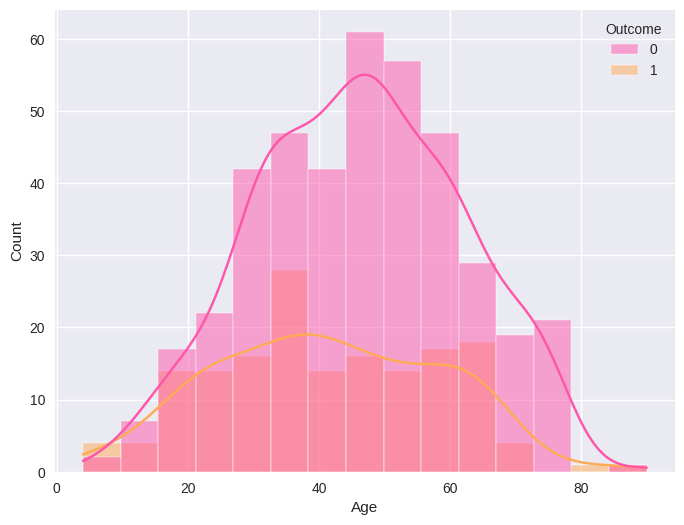

In [28]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = df['Age'], hue = df['Outcome'], palette = 'spring', kde = True);

## Splitting the data into training and test data sets

* Here we are trying to predict whether the patient has an Unhealthy Liver or not using the given data. Hence , the Outcome will be the y label and rest of the data will be the x or the input data:


In [29]:
# X data 
X = df.drop('Outcome', axis = 1)

X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alkaline_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [30]:
# y data 
y = df['Outcome']
y

0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Outcome, Length: 579, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
len(X_train), len (X_test)

(463, 116)

In [33]:
## scaling the data :

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.fit_transform(X_test)

## Logistic Regression


In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [46]:
score = lr.score(X_test, y_test)
print('Test Accuracy Score', score*100)

Test Accuracy Score 68.10344827586206


Text(0.5, 1.03, 'confusion matrics for Logistic Regression')

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


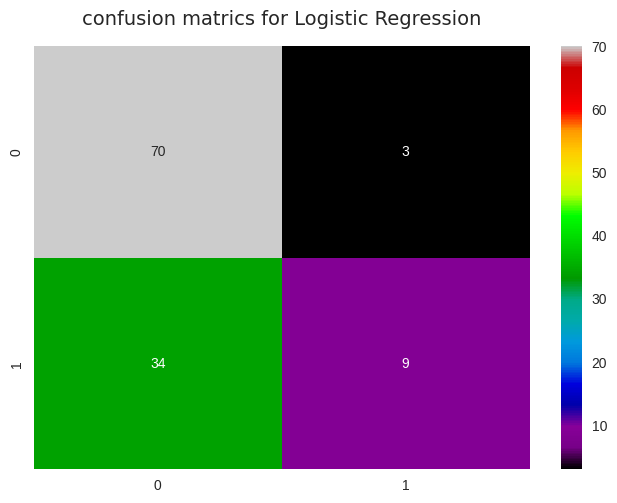

In [41]:
## Having a look at the confusion matrix

from sklearn.metrics import confusion_matrix,classification_report

y_pred_lr = lr.predict(X_test)
cf_matrics = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cf_matrics, annot = True , cmap = 'nipy_spectral')
plt.title('confusion matrics for Logistic Regression', fontsize = 14 , fontname = "Helvetica", y = 1.03)

In [43]:
## Having a look at the classification report of Logistic Regression

from sklearn import metrics
 
print(metrics.classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79        73
           1       0.75      0.21      0.33        43

    accuracy                           0.68       116
   macro avg       0.71      0.58      0.56       116
weighted avg       0.70      0.68      0.62       116



## Random Forest Classifier 

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
rfc_score = rfc.score(X_test, y_test)
print('RandomForest Accuracy Score', rfc_score*100)

RandomForest Accuracy Score 68.10344827586206


Text(0.5, 1.03, 'confusion matrics for RandomForest classifier')

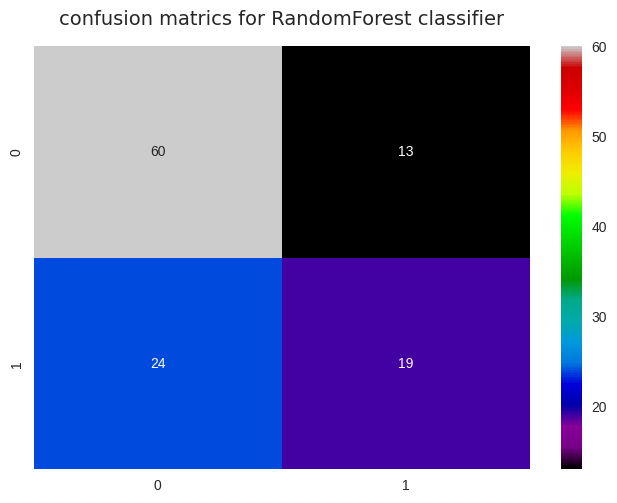

In [49]:
## Having a look at the confusion matrix


y_pred_rfc = rfc.predict(X_test)
cf_matrics = confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cf_matrics, annot = True , cmap = 'nipy_spectral')
plt.title('confusion matrics for RandomForest classifier', fontsize = 14 , fontname = "Helvetica", y = 1.03)

In [50]:
## Having a look at the classification report of Logistic Regression

print(metrics.classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76        73
           1       0.59      0.44      0.51        43

    accuracy                           0.68       116
   macro avg       0.65      0.63      0.64       116
weighted avg       0.67      0.68      0.67       116



## K Neibhours  Classifier 

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [53]:
knn_score = knn.score(X_test,y_test)

print('RandomForest Accuracy Score', knn_score*100)

RandomForest Accuracy Score 62.06896551724138


Text(0.5, 1.03, 'confusion matrics for K Neighbours')

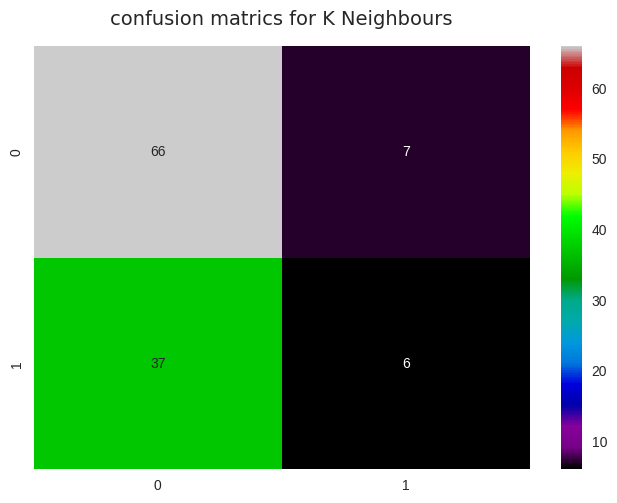

In [55]:
## Having a look at the confusion matrix


y_pred_knn = knn.predict(X_test)
cf_matrics = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cf_matrics, annot = True , cmap = 'nipy_spectral')
plt.title('confusion matrics for K Neighbours', fontsize = 14 , fontname = "Helvetica", y = 1.03)

In [56]:
## Having a look at the classification report of Logistic Regression

print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        73
           1       0.46      0.14      0.21        43

    accuracy                           0.62       116
   macro avg       0.55      0.52      0.48       116
weighted avg       0.57      0.62      0.55       116

